<a href="https://colab.research.google.com/github/DangMinh21/CS114.L22.KHCL/blob/main/Do_an_cuoi_ki/VietNameseHandwrittenCharacterWithdataFlatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare


In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import time
import pickle

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 40,40

# Read data

In [ ]:
TrainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_Flatten/train_data_flat.csv')
TestData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataML/Data_Flatten/test_data_flat.csv')

In [ ]:
label_dict = dict()
labels = []
with open('/content/drive/MyDrive/Colab Notebooks/dataML/KiTu_So.txt', 'r') as f:
  lines = f.readlines()
for line in lines:
  l = line.split()
  label_dict[int(l[0])] = l[1]
  labels.append(l[1])
print('label tương ứng: ')
print(label_dict)
print(labels)

label tương ứng: 
{1: 'a', 2: 'á', 3: 'à', 4: 'ả', 5: 'ạ', 6: 'ã', 7: 'ă', 8: 'ắ', 9: 'ằ', 10: 'ẳ', 11: 'ặ', 12: 'ẵ', 13: 'â', 14: 'ấ', 15: 'ầ', 16: 'ẩ', 17: 'ậ', 18: 'ẫ', 19: 'b', 20: 'c', 21: 'd', 22: 'đ', 23: 'e', 24: 'é', 25: 'è', 26: 'ẻ', 27: 'ẹ', 28: 'ẽ', 29: 'ê', 30: 'ế', 31: 'ề', 32: 'ể', 33: 'ệ', 34: 'ễ', 35: 'g', 36: 'h', 37: 'i', 38: 'í', 39: 'ì', 40: 'ỉ', 41: 'ị', 42: 'ĩ', 43: 'k', 44: 'l', 45: 'm', 46: 'n', 47: 'o', 48: 'ó', 49: 'ò', 50: 'ỏ', 51: 'ọ', 52: 'õ', 53: 'ô', 54: 'ố', 55: 'ồ', 56: 'ổ', 57: 'ộ', 58: 'ỗ', 59: 'ơ', 60: 'ớ', 61: 'ờ', 62: 'ở', 63: 'ợ', 64: 'ỡ', 65: 'p', 66: 'q', 67: 'r', 68: 's', 69: 't', 70: 'u', 71: 'ú', 72: 'ù', 73: 'ủ', 74: 'ụ', 75: 'ũ', 76: 'ư', 77: 'ứ', 78: 'ừ', 79: 'ử', 80: 'ự', 81: 'ữ', 82: 'v', 83: 'x', 84: 'y', 85: 'ý', 86: 'ỳ', 87: 'ỹ', 88: 'ỷ', 89: 'ỵ'}
['a', 'á', 'à', 'ả', 'ạ', 'ã', 'ă', 'ắ', 'ằ', 'ẳ', 'ặ', 'ẵ', 'â', 'ấ', 'ầ', 'ẩ', 'ậ', 'ẫ', 'b', 'c', 'd', 'đ', 'e', 'é', 'è', 'ẻ', 'ẹ', 'ẽ', 'ê', 'ế', 'ề', 'ể', 'ệ', 'ễ', 'g', 'h', 'i', 'í'

In [ ]:
# Chia feature va label
x_train = TrainData.drop('label', axis=1)
y_train = TrainData['label']
x_test = TestData.drop('label', axis=1)
y_test = TestData['label']

In [ ]:
print(f'Shape of train data {x_train.shape}, {y_train.shape}')
print(f'Shape of test data {x_test.shape}, {y_test.shape}')

Shape of train data (26279, 256), (26279,)
Shape of test data (8760, 256), (8760,)


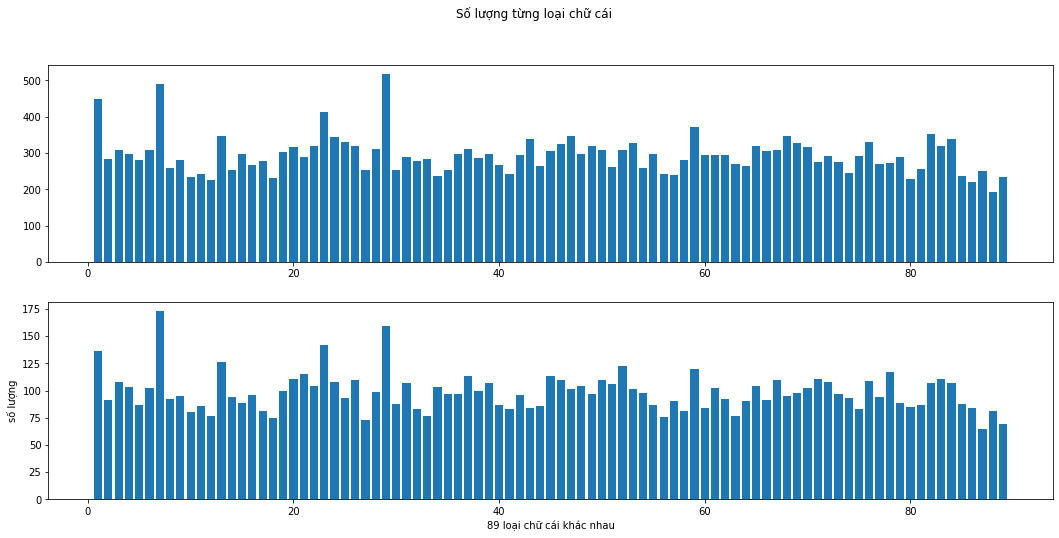

In [ ]:
plot_train = y_train.value_counts()
plot_test = y_test.value_counts()

fig, axis = plt.subplots(nrows=2, ncols=1, figsize=(18, 8))
plt.xlabel('89 loại chữ cái khác nhau')
plt.ylabel('số lượng')
plt.suptitle('Số lượng từng loại chữ cái')
axis[0].bar(plot_train.index, plot_train)
axis[1].bar(plot_test.index, plot_test)
plt.show()

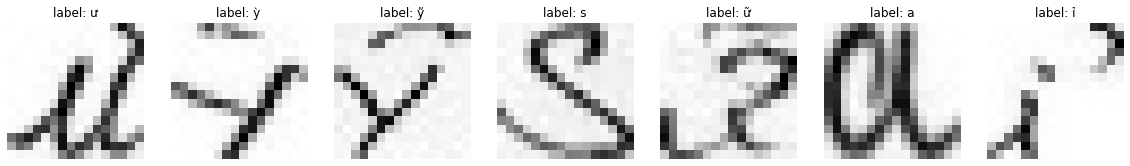

In [ ]:
# show một vài chữ cái
imgs = [0, 500, 1000, 2000, 4000, 10000, 20000]

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 3))
for ax, img in zip(axes, imgs):
    ax.set_axis_off()
    image = np.array(x_train.iloc[img]).reshape((16, 16))
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('label: {}'.format(label_dict[int(y_train[img])]))

In [ ]:
#preprocess: scale featuer [0, 1]
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
print(x_train)

[[0.00784314 0.         0.         ... 0.43921569 0.12156863 0.05882353]
 [0.05882353 0.0627451  0.04705882 ... 0.05490196 0.05490196 0.05490196]
 [0.         0.         0.         ... 0.         0.00392157 0.        ]
 ...
 [0.03921569 0.03137255 0.02745098 ... 0.04313725 0.05098039 0.04705882]
 [0.02745098 0.16470588 0.41176471 ... 0.54509804 0.39607843 0.05882353]
 [0.01960784 0.03921569 0.02352941 ... 0.04313725 0.05098039 0.04313725]]


In [ ]:
print(x_test)

[[0.03137255 0.03921569 0.03529412 ... 0.03921569 0.03921569 0.04705882]
 [0.00392157 0.         0.00784314 ... 0.         0.00392157 0.00392157]
 [0.         0.00392157 0.00392157 ... 0.00392157 0.         0.01176471]
 ...
 [0.00392157 0.         0.01568627 ... 0.00784314 0.         0.01176471]
 [0.         0.01176471 0.01568627 ... 0.00784314 0.01568627 0.00784314]
 [0.00392157 0.00784314 0.         ... 0.01568627 0.01176471 0.00392157]]


# Model

## Logistic regression

### LR c=0.01, solver = saga

In [ ]:
modelLR1 = LogisticRegression(C=0.01 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR1.fit(x_train, y_train)
end_time = time.time()
print(f'timer: {end_time-start_time}')
print(f'Train Score: {modelLR1.score(x_train, y_train)}')
print(f'Test Score: {modelLR1.score(x_test, y_test)}')

timer: 125.10022163391113
Train Score: 0.5006278777731268
Test Score: 0.4678082191780822


In [ ]:
pickle.dump(modelLR1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelLR1.pickle','wb'))

### LR c=0.1, solver = saga

In [ ]:
modelLR2 = LogisticRegression(C=0.1 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR2.score(x_train, y_train)}')
print(f'Test Score: {modelLR2.score(x_test, y_test)}')

Timer: 290.1972007751465
Train Score: 0.6271928155561475
Test Score: 0.5546803652968036


In [ ]:
pickle.dump(modelLR2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelLR2.pickle','wb'))

### LR c=1, solver = saga

In [ ]:
modelLR3 = LogisticRegression(C=1 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR3.score(x_train, y_train)}')
print(f'Test Score: {modelLR3.score(x_test, y_test)}')

Timer: 368.6111493110657
Train Score: 0.7012823927851136
Test Score: 0.5646118721461187


In [ ]:
pickle.dump(modelLR3, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelLR3.pickle','wb'))

### LR c=10, solver = saga

In [ ]:
modelLR4 = LogisticRegression(C=10 ,solver='saga', max_iter=1000)
start_time = time.time()
modelLR4.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelLR4.score(x_train, y_train)}')
print(f'Test Score: {modelLR4.score(x_test, y_test)}')

Timer: 3104.0311665534973
Train Score: 0.7344647817649074
Test Score: 0.5439497716894978


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
pickle.dump(modelLR4, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelLR4.pickle','wb'))

### LR c=0.5, solver = liblinear

In [ ]:
modelLR11 = LogisticRegression(C=0.5, solver='liblinear', max_iter=500, random_state=42)
start_time = time.time()
modelLR11.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictLR11Train = modelLR11.predict(x_train)
predictLR11Test = modelLR11.predict(x_test)
print(f'Train Score: {modelLR11.score(x_train, y_train)}')
print(f'Test Score: {modelLR11.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictLR11Train, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictLR11Test, target_names=labels))

Timer: 151.55714297294617
Train Score: 0.6429789653212052
Test Score: 0.5442918048318333
classification report on train set
              precision    recall  f1-score   support

           a       0.67      0.85      0.75       413
           á       0.61      0.65      0.63       268
           à       0.47      0.45      0.46       291
           ả       0.58      0.65      0.61       279
           ạ       0.82      0.85      0.83       264
           ã       0.47      0.31      0.37       285
           ă       0.47      0.63      0.54       455
           ắ       0.50      0.44      0.47       239
           ằ       0.50      0.61      0.55       262
           ẳ       0.54      0.37      0.44       221
           ặ       0.71      0.68      0.69       230
           ẵ       0.53      0.40      0.46       218
           â       0.52      0.59      0.55       324
           ấ       0.56      0.58      0.57       236
           ầ       0.48      0.54      0.51       278
           

### Kết luận
* LR c=1, solver=saga có score cao nhất

Train Score: 0.7012823927851136


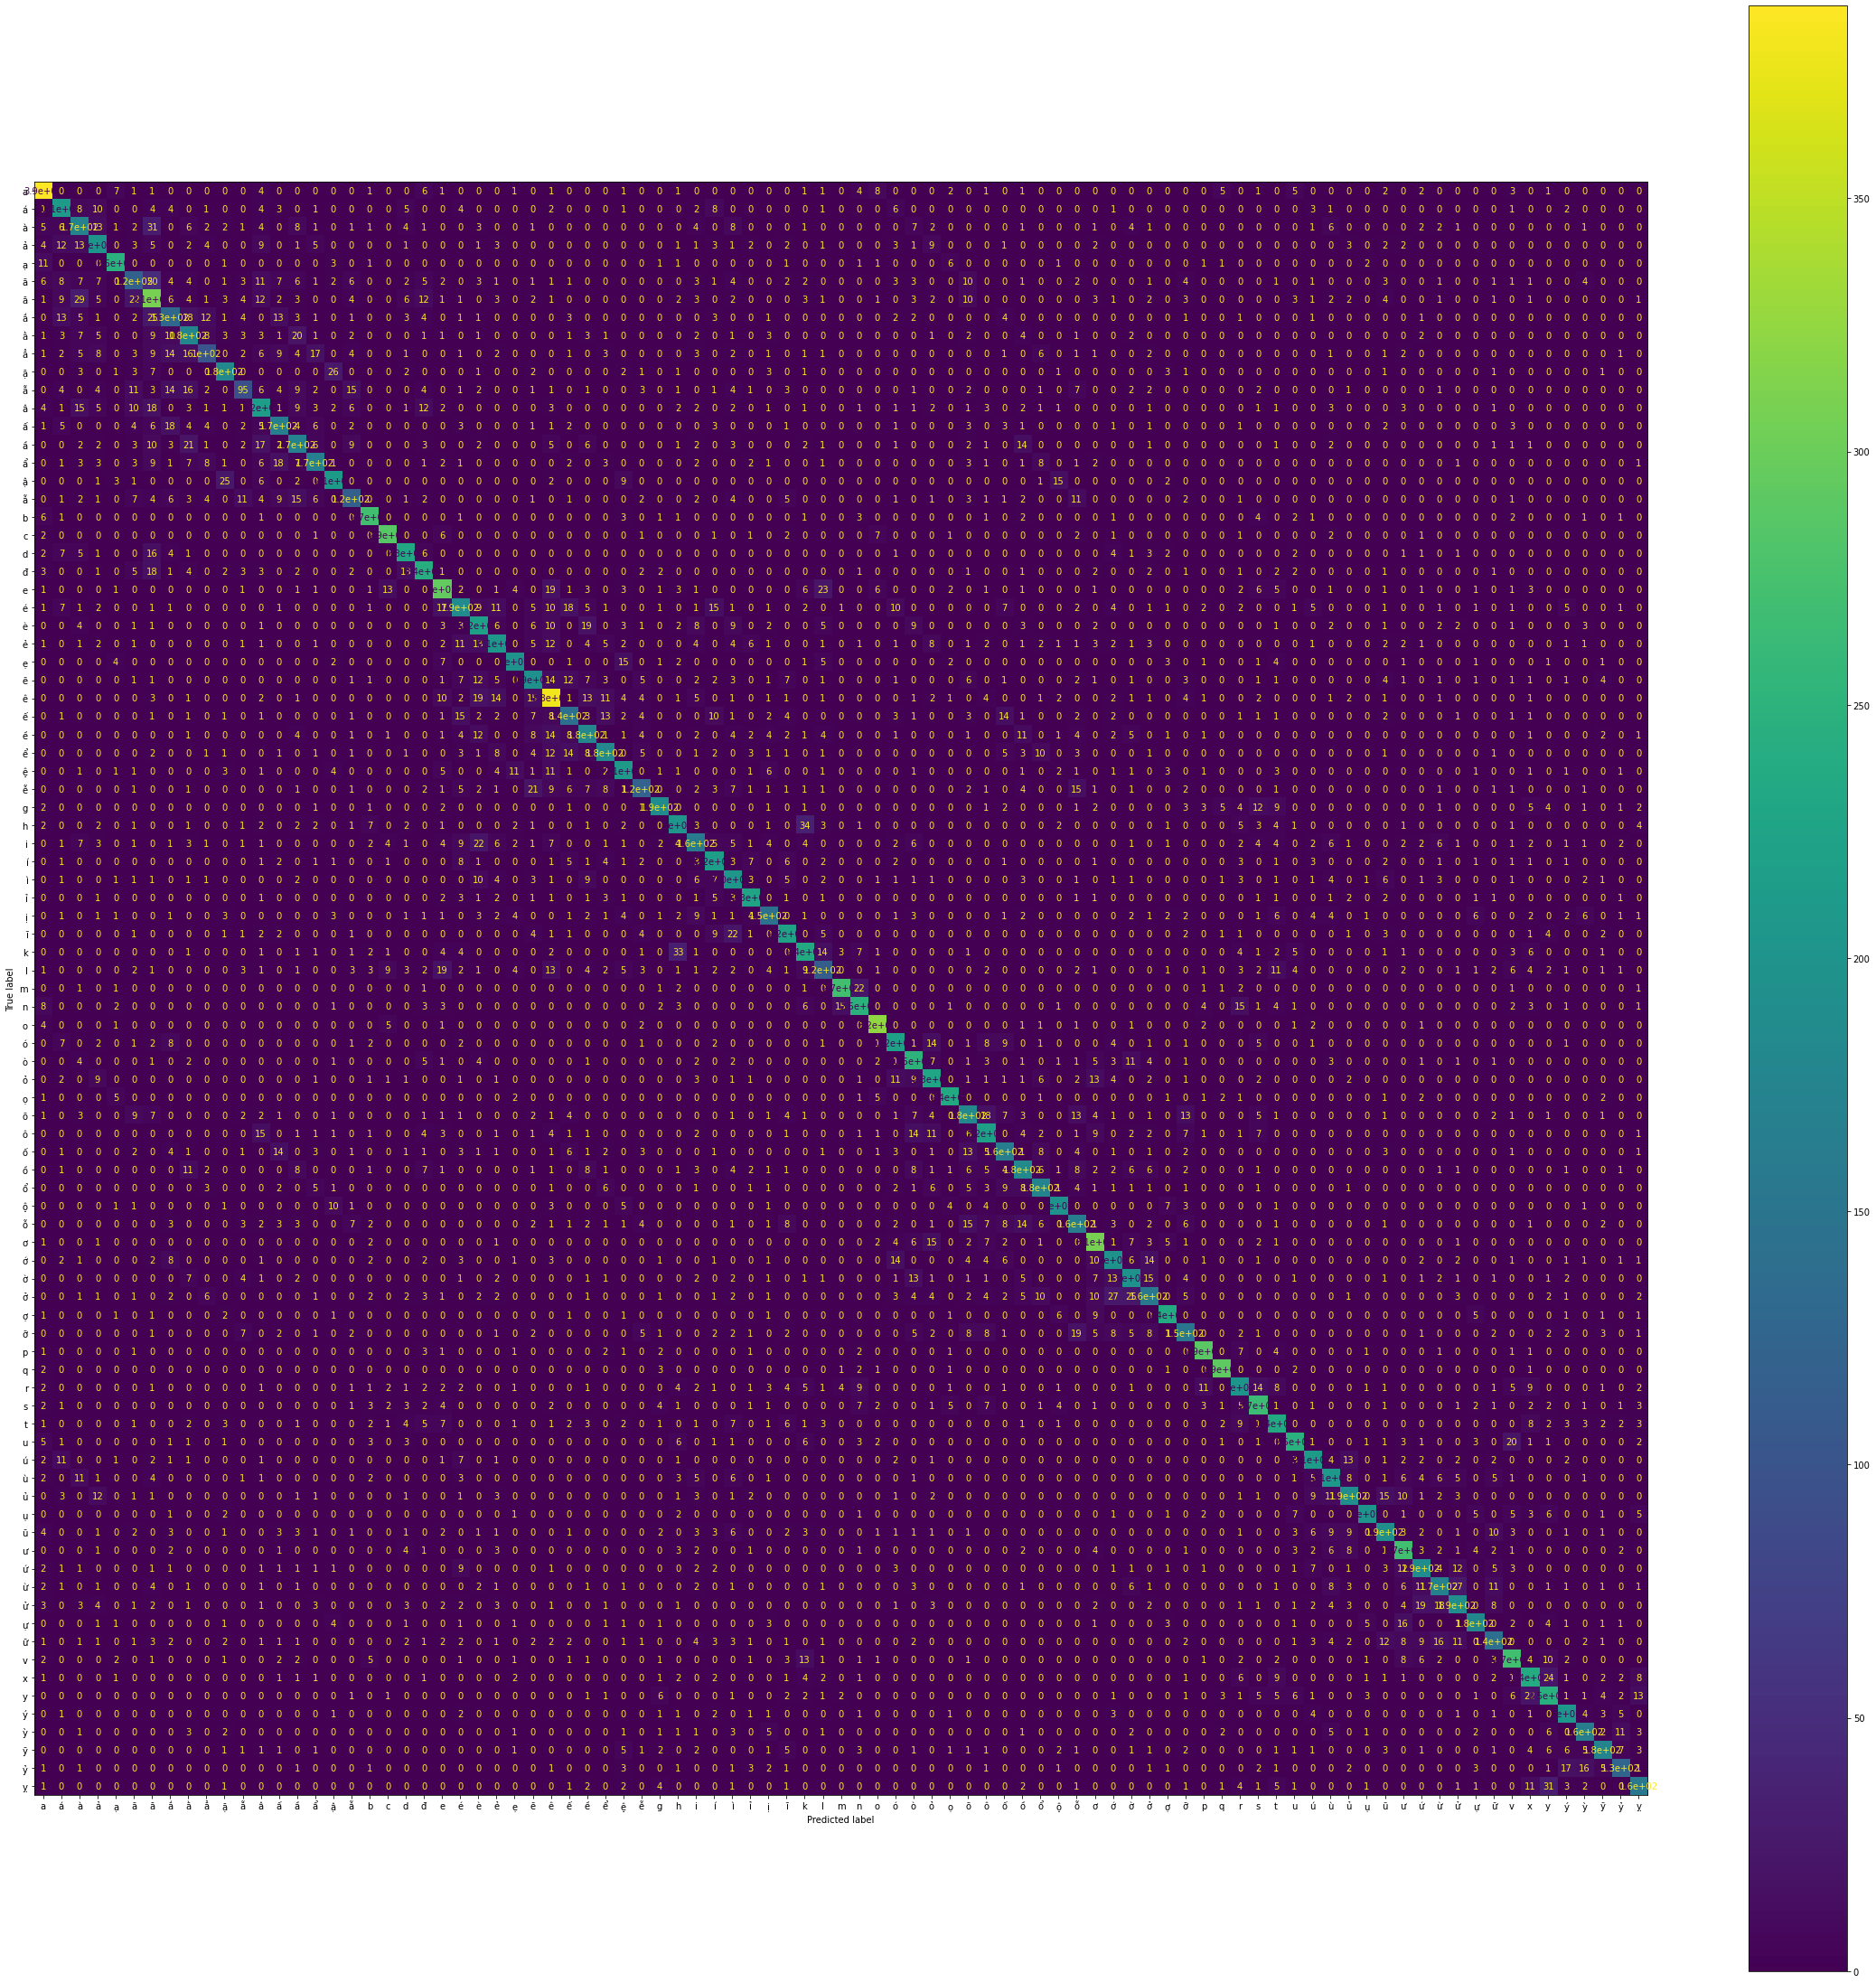

classification report on train set
              precision    recall  f1-score   support

           a       0.79      0.86      0.82       450
           á       0.64      0.74      0.69       284
           à       0.54      0.56      0.55       308
           ả       0.64      0.67      0.66       298
           ạ       0.87      0.89      0.88       280
           ã       0.52      0.39      0.44       308
           ă       0.53      0.63      0.58       491
           ắ       0.51      0.51      0.51       258
           ằ       0.54      0.64      0.59       280
           ẳ       0.62      0.44      0.51       234
           ặ       0.73      0.75      0.74       242
           ẵ       0.60      0.42      0.49       227
           â       0.60      0.63      0.61       347
           ấ       0.61      0.65      0.63       254
           ầ       0.56      0.57      0.57       299
           ẩ       0.68      0.62      0.65       268
           ậ       0.76      0.76      0.76   

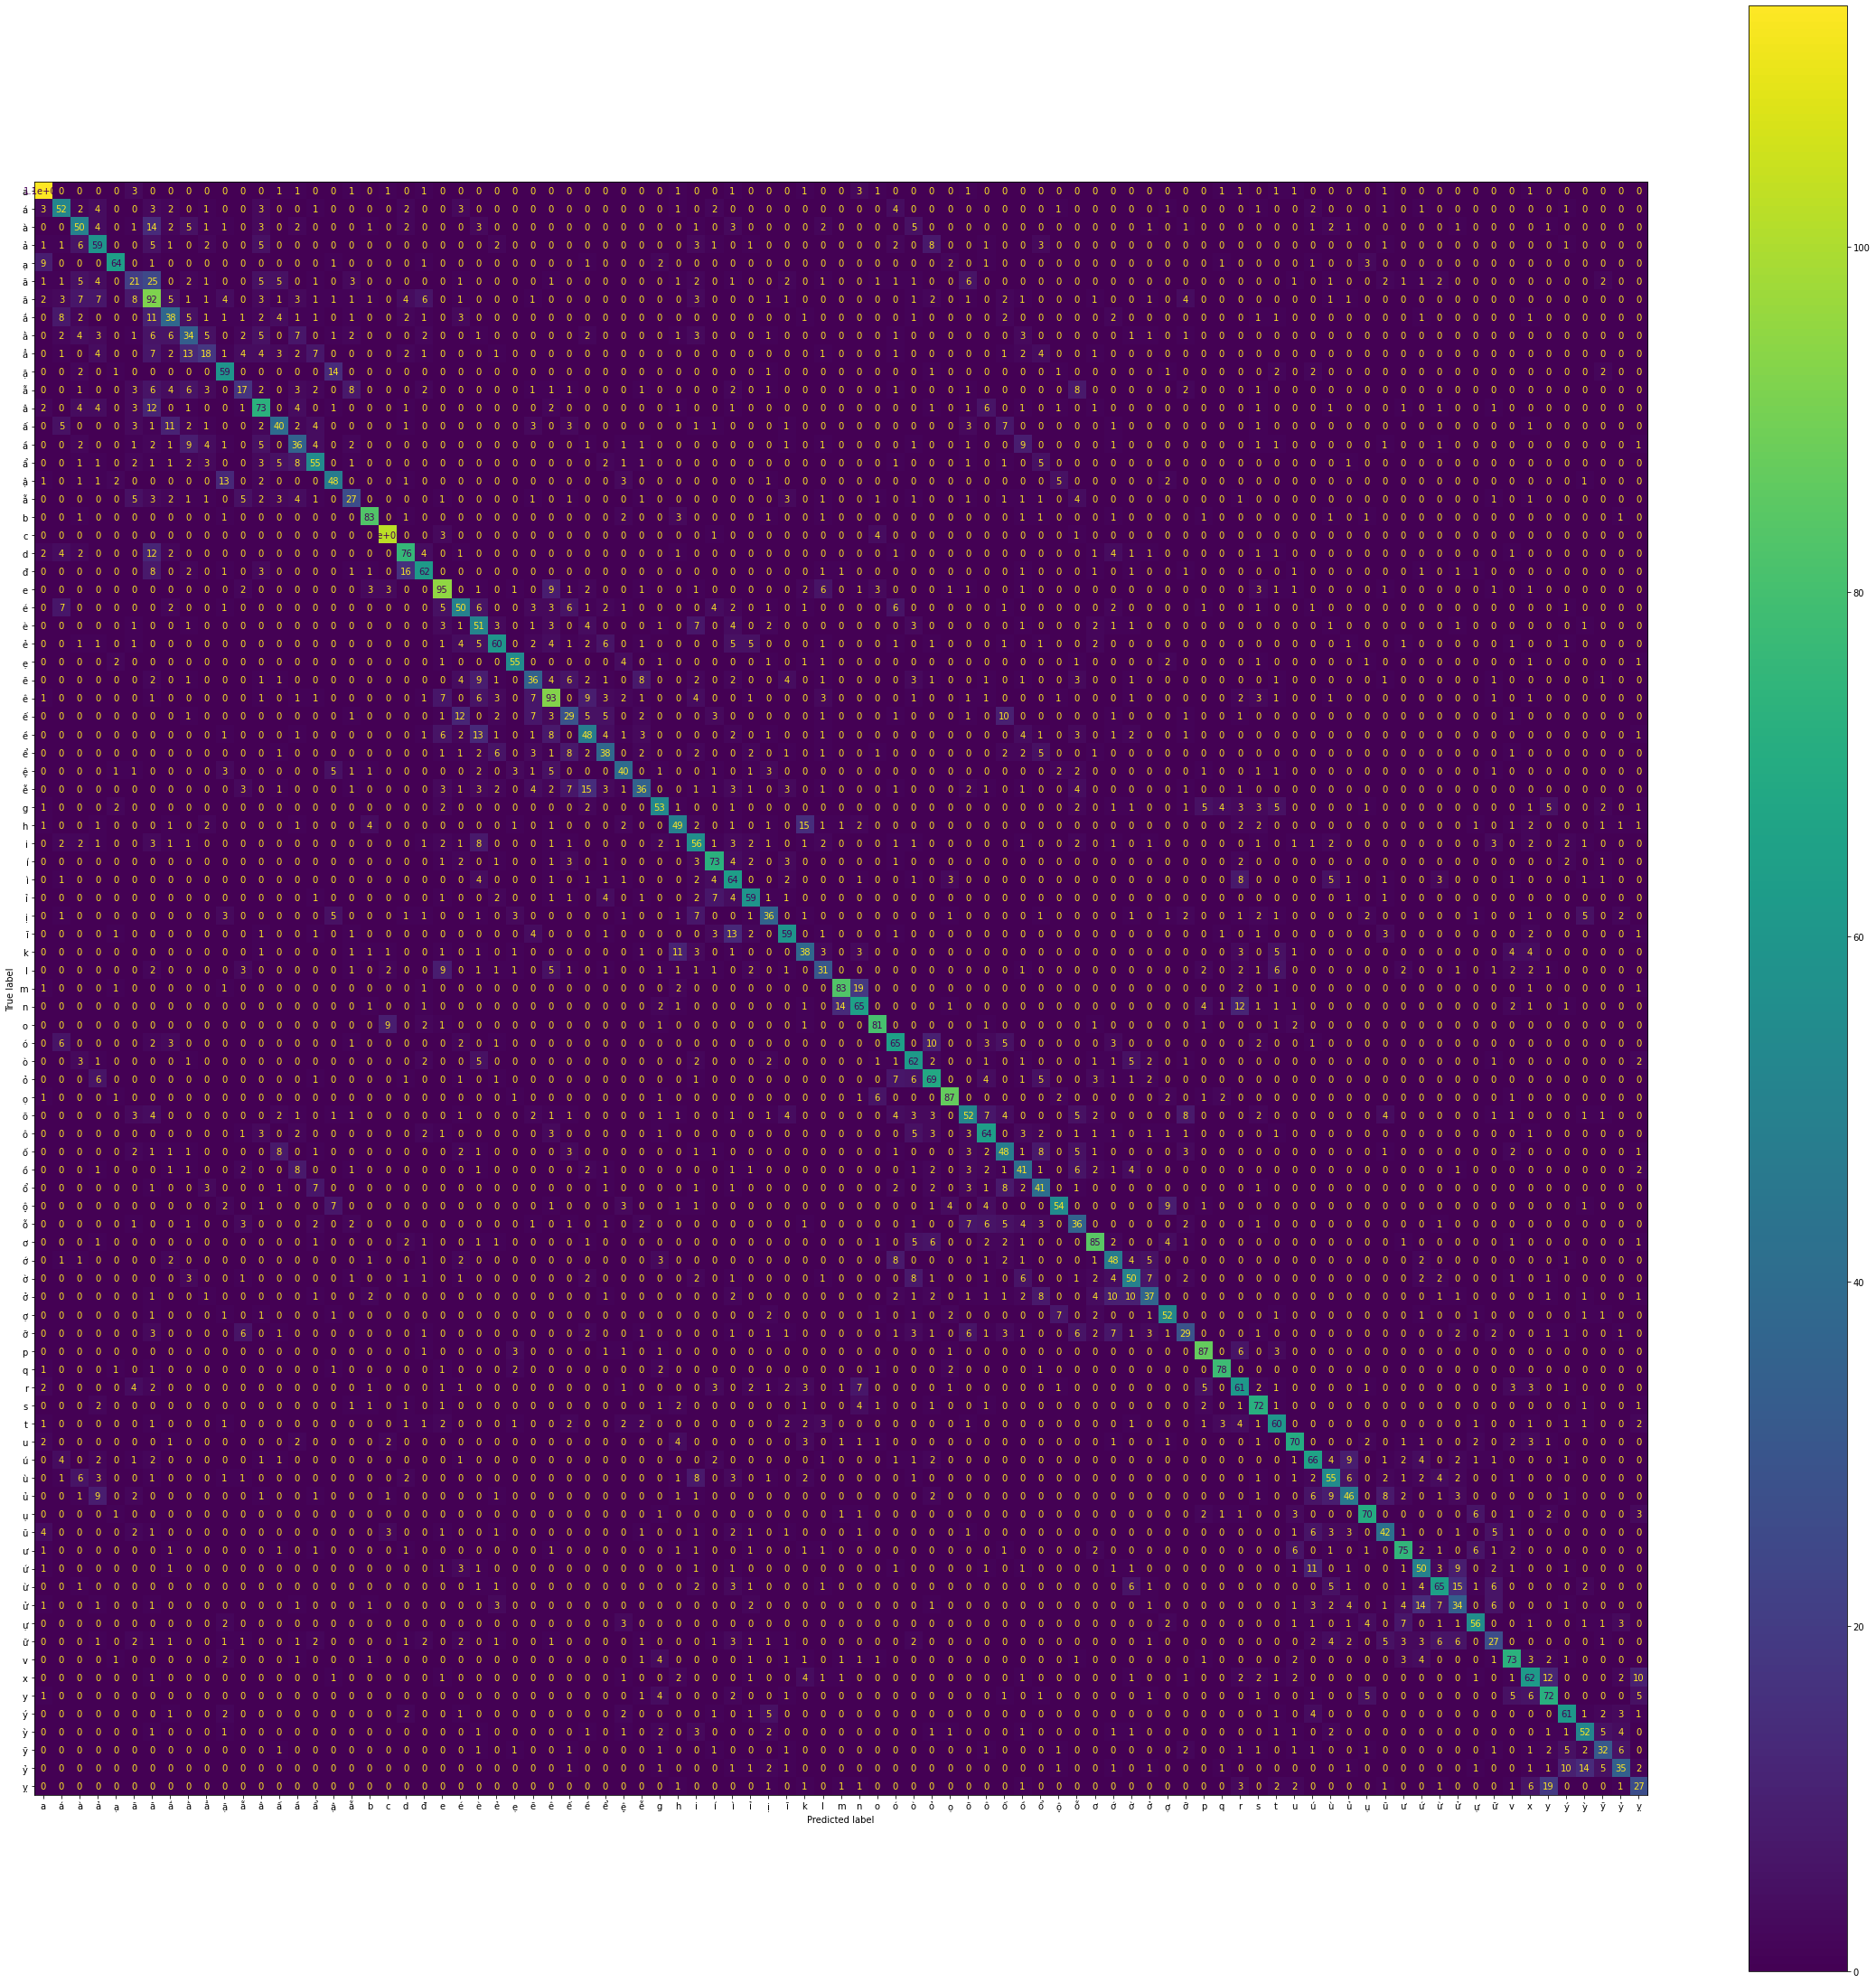

classification report on test set
              precision    recall  f1-score   support

           a       0.74      0.84      0.79       136
           á       0.52      0.57      0.54        91
           à       0.48      0.46      0.47       108
           ả       0.49      0.57      0.53       103
           ạ       0.82      0.74      0.78        87
           ã       0.30      0.21      0.24       102
           ă       0.38      0.53      0.44       173
           ắ       0.41      0.41      0.41        92
           ằ       0.36      0.36      0.36        95
           ẳ       0.38      0.23      0.28        80
           ặ       0.57      0.69      0.62        86
           ẵ       0.32      0.22      0.26        77
           â       0.55      0.58      0.56       126
           ấ       0.50      0.43      0.46        94
           ầ       0.39      0.40      0.40        89
           ẩ       0.57      0.57      0.57        96
           ậ       0.55      0.59      0.57    

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelLR3.pickle", 'rb') as file_model:
    modelLR = pickle.load(file_model)
    
print(f'Train Score: {modelLR.score(x_train, y_train)}')
cm = plot_confusion_matrix(modelLR, x_train, y_train, display_labels=labels)
plt.show()
print(f'classification report on train set')
predictTrain = modelLR.predict(x_train)
print(classification_report(y_train, predictTrain, target_names=labels))

print(f'Test Score: {modelLR.score(x_test, y_test)}')
cm = plot_confusion_matrix(modelLR, x_test, y_test, display_labels=labels)
plt.show()
print(f'classification report on test set')
predictTest = modelLR.predict(x_test)
print(classification_report(y_test, predictTest, target_names=labels))

# SVM

## Linear SVM

In [ ]:
modelLinearSVM = LinearSVC(max_iter=5000)
start_time = time.time()
modelLinearSVM.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictLinearSVMTrain = modelLinearSVM.predict(x_train)
predictLinearSVMTest = modelLinearSVM.predict(x_test)
print(f'Train Score: {modelLinearSVM.score(x_train, y_train)}')
print(f'Test Score: {modelLinearSVM.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictLinearSVMTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictLinearSVMTest, target_names=labels))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Timer: 327.1232388019562
Train Score: 0.6502883131649476
Test Score: 0.5019422074846045
classification report on train set
              precision    recall  f1-score   support

           a       0.69      0.86      0.76       413
           á       0.58      0.71      0.64       268
           à       0.51      0.43      0.46       291
           ả       0.56      0.68      0.61       279
           ạ       0.86      0.91      0.89       264
           ã       0.45      0.22      0.30       285
           ă       0.51      0.59      0.55       455
           ắ       0.53      0.44      0.48       239
           ằ       0.52      0.61      0.56       262
           ẳ       0.58      0.40      0.47       221
           ặ       0.72      0.79      0.75       230
           ẵ       0.56      0.39      0.46       218
           â       0.55      0.56      0.56       324
           ấ       0.56      0.61      0.59       236
           ầ       0.50      0.50      0.50       278
           ẩ

## SVM

### SVM c=1, kernel = rbf

In [ ]:
modelSVM1 = SVC(C=1, kernel='rbf')
start_time = time.time()
modelSVM1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM1.score(x_train, y_train)}')
print(f'Test Score: {modelSVM1.score(x_test, y_test)}')

Timer: 226.92510509490967
Train Score: 0.9003767266638761
Test Score: 0.7353881278538813


In [ ]:
pickle.dump(modelSVM1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelSVM1.pickle','wb'))

### SVM c=1, kernel = poly

In [ ]:
modelSVM2 = SVC(C=1, kernel='poly', max_iter=5000)
start_time = time.time()
modelSVM2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM2.score(x_train, y_train)}')

Timer: 144.50909876823425
Train Score: 0.9385821378286845


In [ ]:
print(f'Test Score: {modelSVM2.score(x_test, y_test)}')

Test Score: 0.7051369863013699


In [ ]:
pickle.dump(modelSVM2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelSVM2.pickle','wb'))

In [ ]:
# có vẻ moddel trên đang bị overfit, chỉnh lại C để model đơn giản hơn
modelSVM3 = SVC(C=0.01, kernel='poly', max_iter=5000)
start_time = time.time()
modelSVM3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM3.score(x_train, y_train)}')
print(f'Test Score: {modelSVM3.score(x_test, y_test)}')

Timer: 406.03187227249146
Train Score: 0.25453784390578027
Test Score: 0.23150684931506849


In [ ]:
# moddel trên đang bị underfit
modelSVM4 = SVC(C=0.1, kernel='poly', max_iter=5000)
start_time = time.time()
modelSVM4.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM4.score(x_train, y_train)}')
print(f'Test Score: {modelSVM4.score(x_test, y_test)}')

Timer: 236.6708059310913
Train Score: 0.6714867384603675
Test Score: 0.5605022831050228


In [ ]:
modelSVM5 = SVC(C=0.1, kernel='rbf')
start_time = time.time()
modelSVM5.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM5.score(x_train, y_train)}')
print(f'Test Score: {modelSVM5.score(x_test, y_test)}')

Timer: 381.84426188468933
Train Score: 0.5448456942806043
Test Score: 0.48504566210045663


In [ ]:
modelSVM5 = SVC(C=10, kernel='rbf')
start_time = time.time()
modelSVM5.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelSVM5.score(x_train, y_train)}')
print(f'Test Score: {modelSVM5.score(x_test, y_test)}')

Timer: 223.89219999313354
Train Score: 0.9999238936032574
Test Score: 0.7737442922374429


In [ ]:
pickle.dump(modelSVM5, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelSVM5.pickle','wb'))

### Kết luận
* Model SVC C=10, kernel=rbf cho score tốt nhất

Train Score: 0.9999238936032574


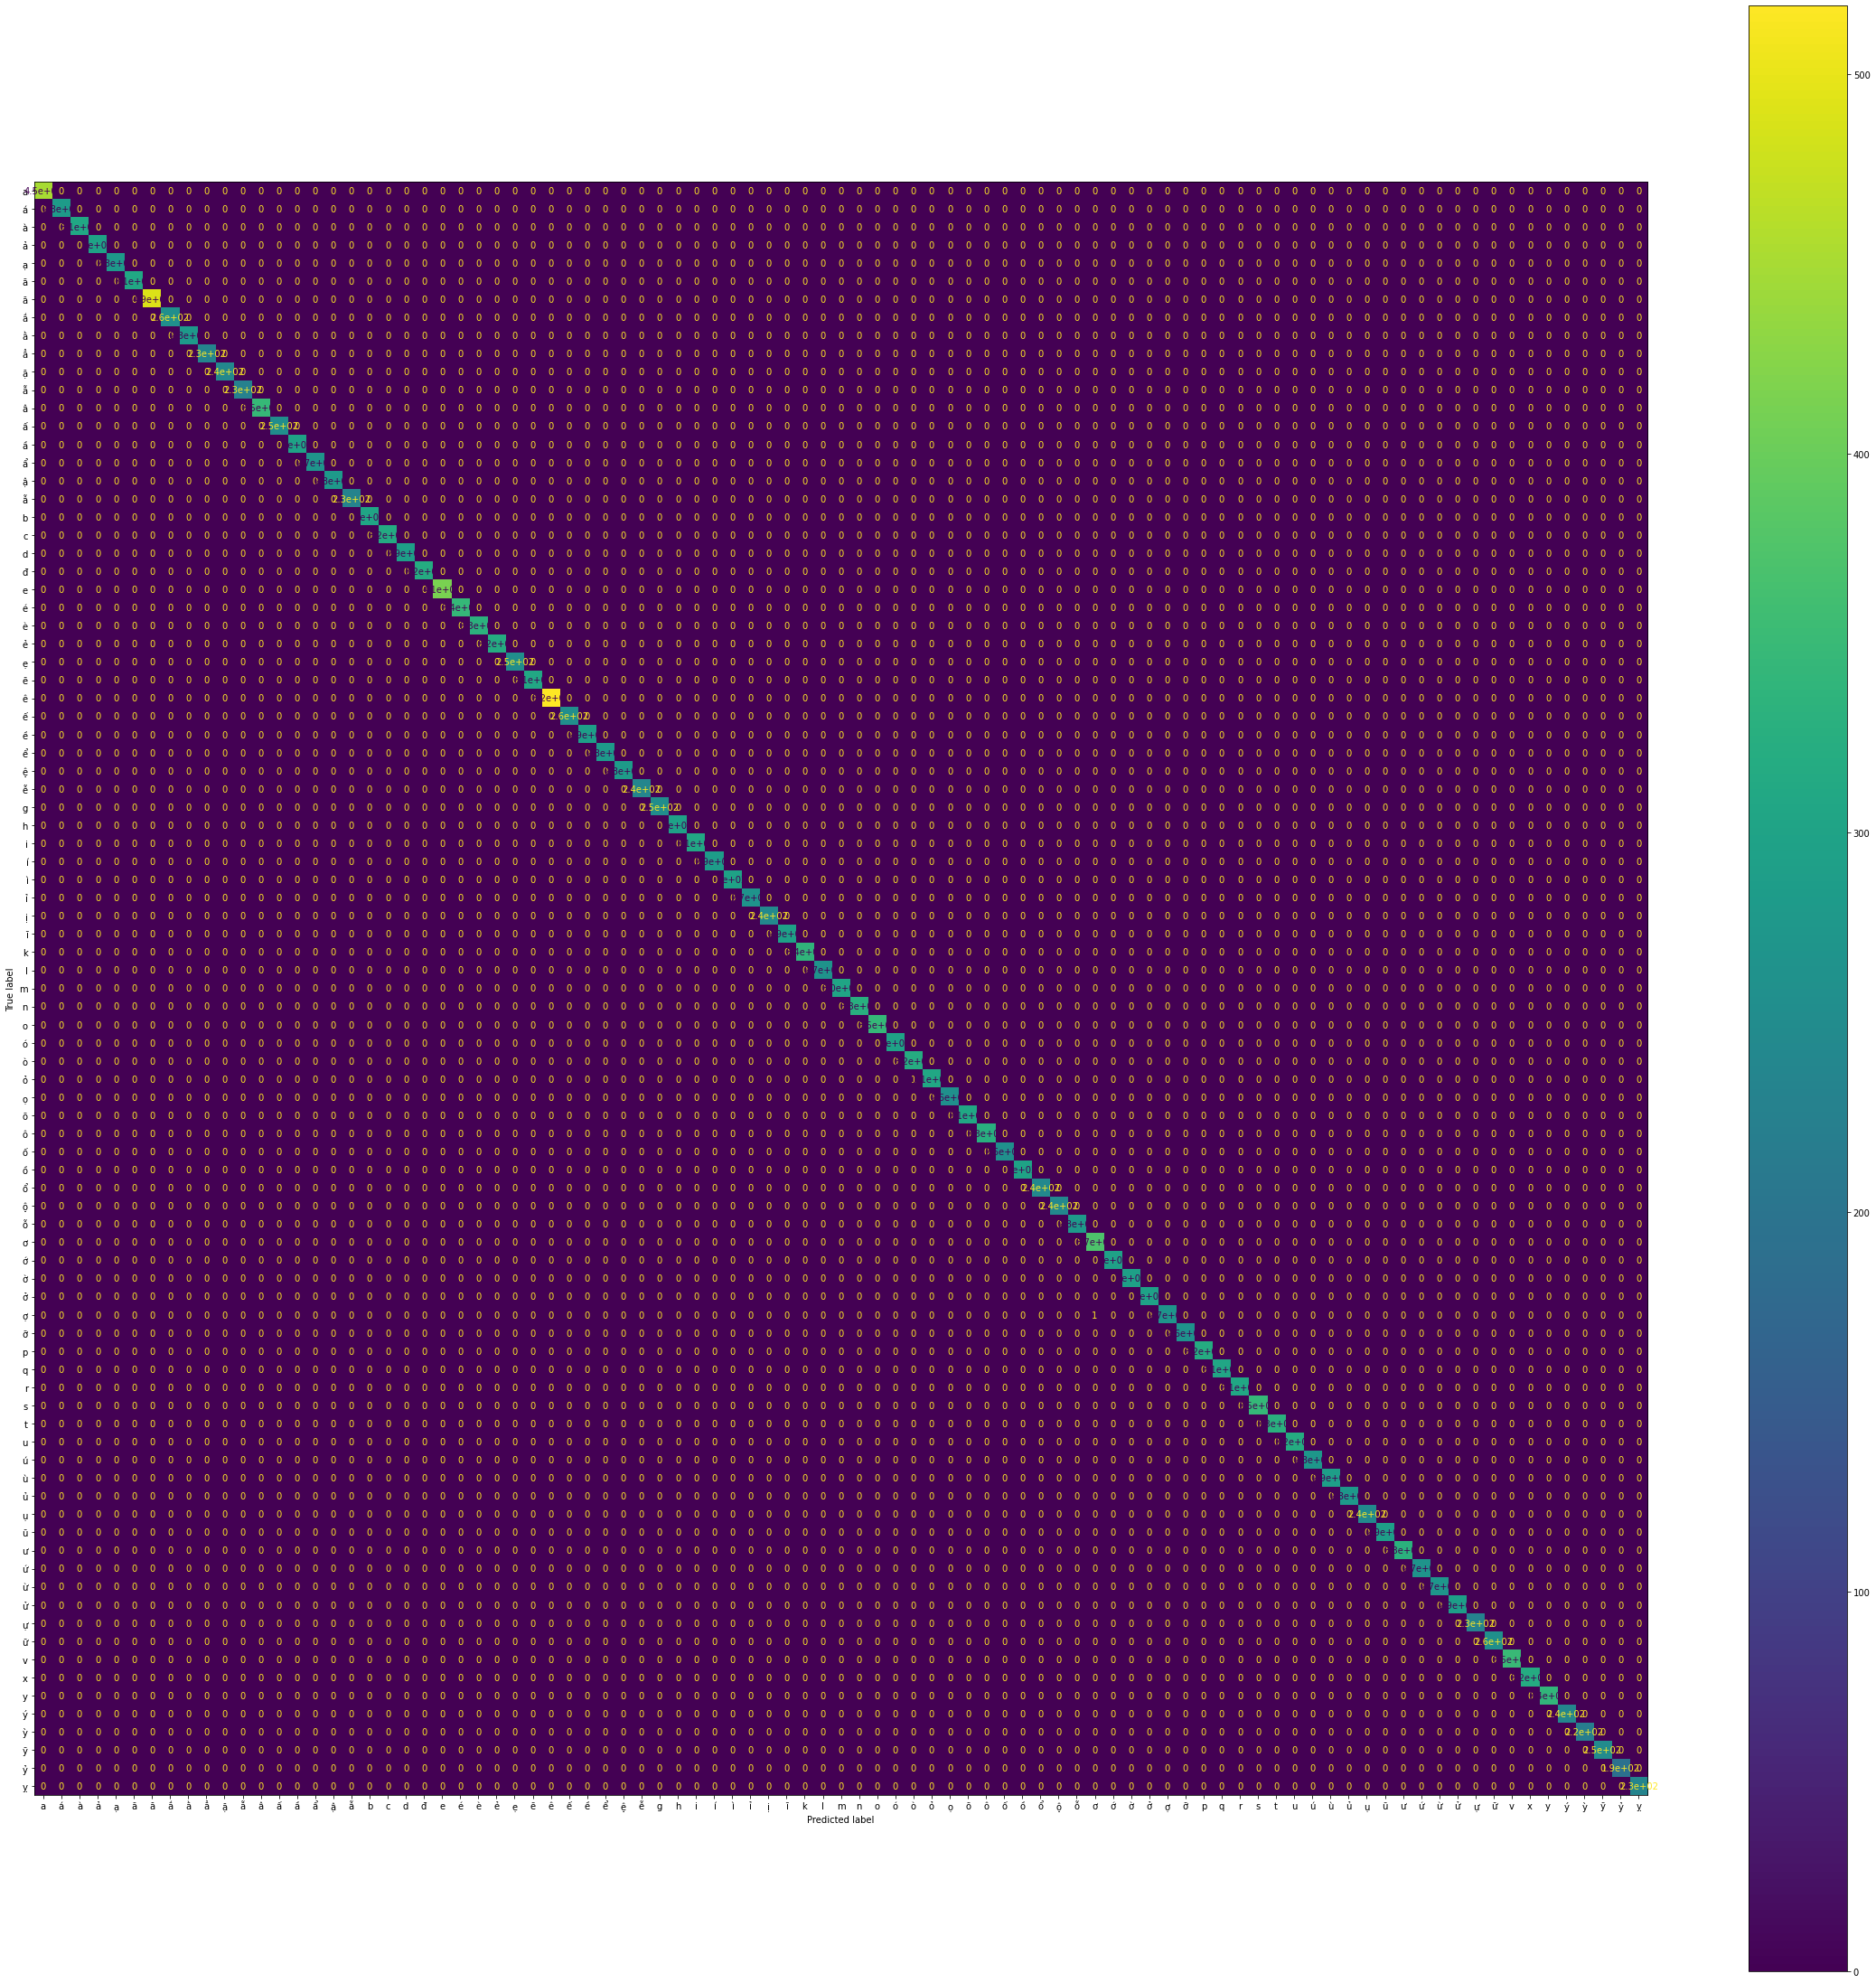

classification report on train set
              precision    recall  f1-score   support

           a       1.00      1.00      1.00       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      1.00      1.00       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           ẩ       1.00      1.00      1.00       268
           ậ       1.00      1.00      1.00   

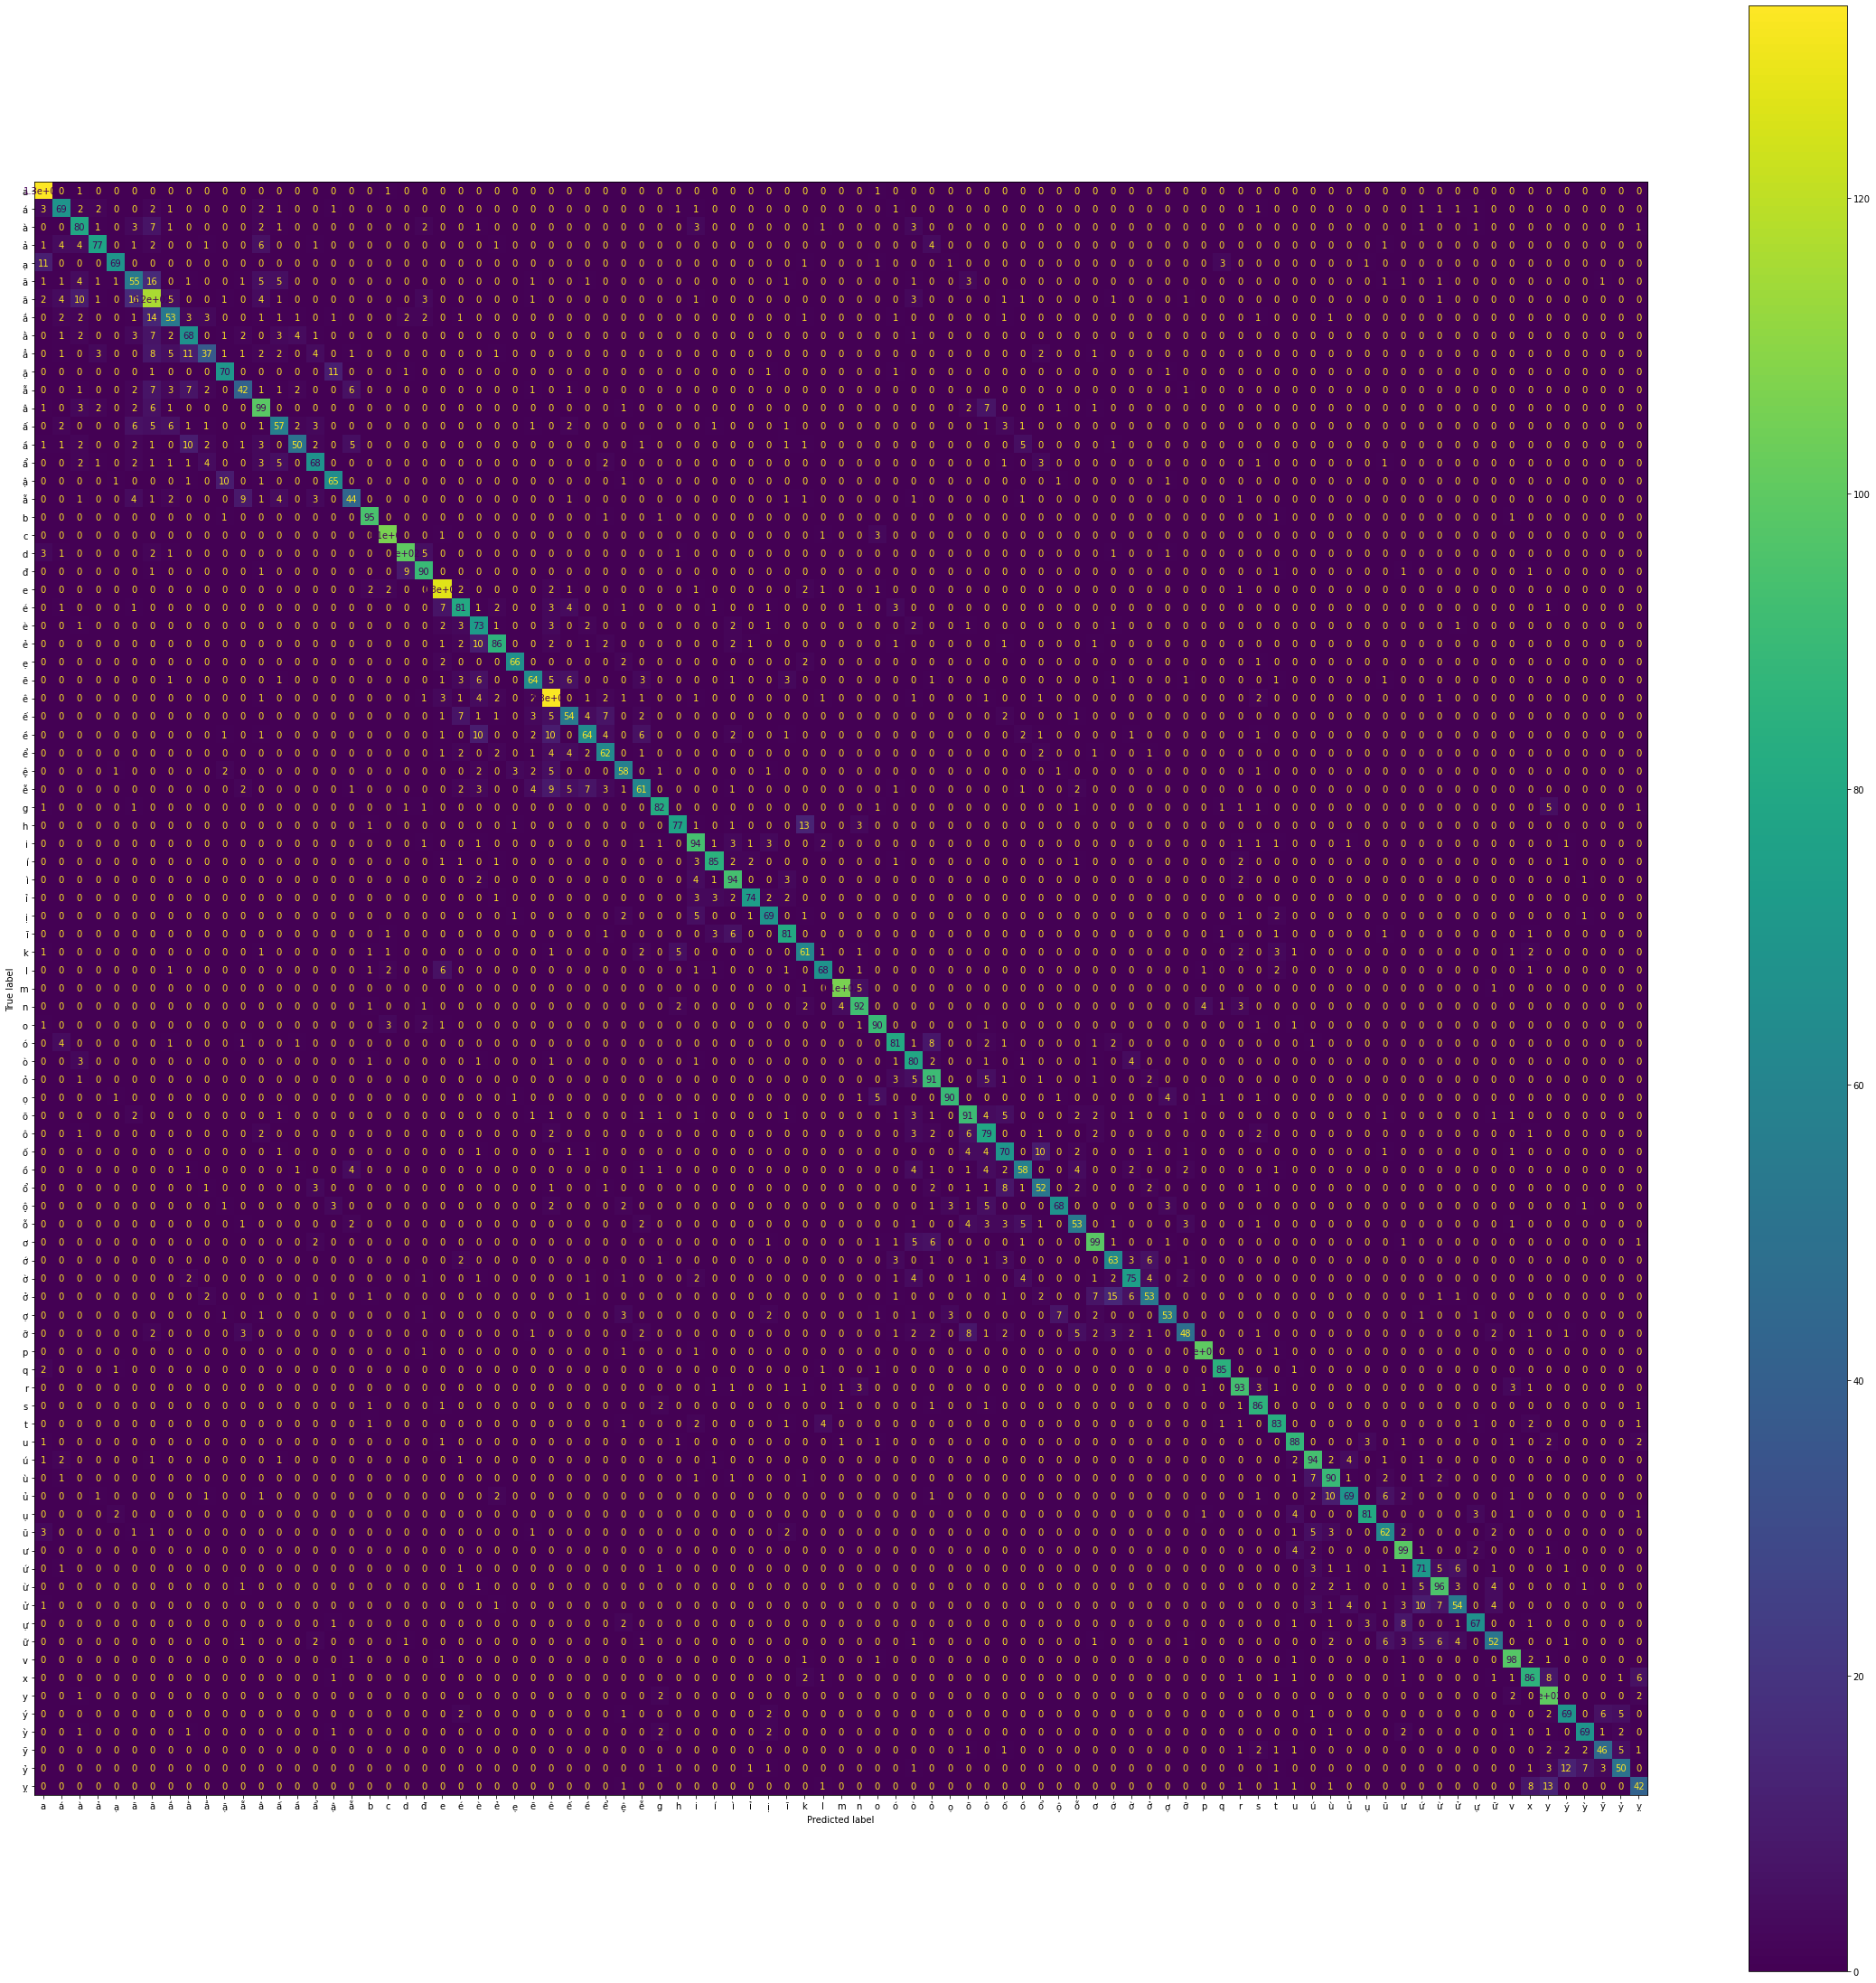

classification report on test set
              precision    recall  f1-score   support

           a       0.80      0.98      0.88       136
           á       0.73      0.76      0.74        91
           à       0.66      0.74      0.70       108
           ả       0.87      0.75      0.80       103
           ạ       0.91      0.79      0.85        87
           ã       0.54      0.54      0.54       102
           ă       0.58      0.67      0.62       173
           ắ       0.63      0.58      0.60        92
           ằ       0.64      0.72      0.67        95
           ẳ       0.69      0.46      0.55        80
           ặ       0.79      0.81      0.80        86
           ẵ       0.65      0.55      0.59        77
           â       0.71      0.79      0.75       126
           ấ       0.67      0.61      0.64        94
           ầ       0.82      0.56      0.67        89
           ẩ       0.76      0.71      0.73        96
           ậ       0.77      0.80      0.79    

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelSVM5.pickle", 'rb') as file_model:
    modelLR = pickle.load(file_model)
    
print(f'Train Score: {modelLR.score(x_train, y_train)}')
cm = plot_confusion_matrix(modelLR, x_train, y_train, display_labels=labels)
plt.show()
print(f'classification report on train set')
predictTrain = modelLR.predict(x_train)
print(classification_report(y_train, predictTrain, target_names=labels))

print(f'Test Score: {modelLR.score(x_test, y_test)}')
cm = plot_confusion_matrix(modelLR, x_test, y_test, display_labels=labels)
plt.show()
print(f'classification report on test set')
predictTest = modelLR.predict(x_test)
print(classification_report(y_test, predictTest, target_names=labels))

### SVM c=1, kernel = sigmoid

In [ ]:
modelSVM3 = SVC(C=1, kernel='sigmoid', max_iter=5000)
start_time = time.time()
modelSVM3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelSVM3.predict(x_train)
predictTest = modelSVM3.predict(x_test)
print(f'Train Score: {modelSVM3.score(x_train, y_train)}')
print(f'Test Score: {modelSVM3.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 166.00852394104004
Train Score: 0.3601072037683749
Test Score: 0.3430601610611085
classification report on train set
              precision    recall  f1-score   support

           a       0.41      0.43      0.42       413
           á       0.56      0.40      0.47       268
           à       0.47      0.27      0.34       291
           ả       0.43      0.49      0.46       279
           ạ       0.43      0.52      0.47       264
           ã       0.35      0.14      0.20       285
           ă       0.32      0.45      0.37       455
           ắ       0.39      0.28      0.33       239
           ằ       0.44      0.44      0.44       262
           ẳ       0.42      0.26      0.32       221
           ặ       0.39      0.51      0.44       230
           ẵ       0.57      0.29      0.38       218
           â       0.39      0.34      0.36       324
           ấ       0.39      0.41      0.40       236
           ầ       0.35      0.28      0.31       278
           

## neural network

### NN (1000,), activation = RELU

In [ ]:
modelNN1 = MLPClassifier(hidden_layer_sizes=(1000,), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN1.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN1.predict(x_train)
predictTest = modelNN1.predict(x_test)
print(f'Train Score: {modelNN1.score(x_train, y_train)}')
print(f'Test Score: {modelNN1.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 449.5135245323181
Train Score: 0.9999619468016286
Test Score: 0.773972602739726
classification report on train set
              precision    recall  f1-score   support

           a       1.00      1.00      1.00       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      1.00      1.00       280
           ã       1.00      1.00      1.00       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           ẩ 

In [ ]:
pickle.dump(modelNN1, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelNN1.pickle','wb'))

### NN (1000, 1000, ), activation = relu

In [ ]:
modelNN2 = MLPClassifier(hidden_layer_sizes=(1000,1000), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN2.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN2.predict(x_train)
predictTest = modelNN2.predict(x_test)
print(f'Train Score: {modelNN2.score(x_train, y_train)}')
print(f'Test Score: {modelNN2.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 647.013322353363
Train Score: 0.9915521899615662
Test Score: 0.7868721461187215
classification report on train set
              precision    recall  f1-score   support

           a       0.96      1.00      0.98       450
           á       0.97      1.00      0.98       284
           à       0.99      0.99      0.99       308
           ả       1.00      0.99      0.99       298
           ạ       1.00      0.97      0.99       280
           ã       0.99      0.99      0.99       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      0.99      0.99       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       1.00      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       0.99      1.00      1.00       299
           ẩ 

In [ ]:
pickle.dump(modelNN2, open('/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelNN2.pickle','wb'))

### NN (1000, 1000,1000, ), activation = logistic

In [ ]:
modelNN3 = MLPClassifier(hidden_layer_sizes=(1000,1000,1000), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN3.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
predictTrain = modelNN3.predict(x_train)
predictTest = modelNN3.predict(x_test)
print(f'Train Score: {modelNN3.score(x_train, y_train)}')
print(f'Test Score: {modelNN3.score(x_test, y_test)}')
print(f'classification report on train set')
print(classification_report(y_train, predictTrain, target_names=labels))
print(f'classification report on test set')
print(classification_report(y_test, predictTest, target_names=labels))

Timer: 1664.4941713809967
Train Score: 0.9958902545758971
Test Score: 0.8039954337899543
classification report on train set
              precision    recall  f1-score   support

           a       0.96      1.00      0.98       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      0.96      0.98       280
           ã       1.00      0.97      0.99       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       0.99      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           

In [ ]:
modelNN4 = MLPClassifier(hidden_layer_sizes=(500,), activation='relu', max_iter=5000, random_state=42)
start_time = time.time()
modelNN4.fit(x_train, y_train)
end_time = time.time()
print(f'Timer: {end_time - start_time}')
print(f'Train Score: {modelNN4.score(x_train, y_train)}')
print(f'Test Score: {modelNN4.score(x_test, y_test)}')

Timer: 281.6226963996887
Train Score: 0.9999619468016286
Test Score: 0.763013698630137


### kết luận 
* Model NN3 (1000, 1000, 1000) có score cao nhất

Train Score: 0.9958902545758971


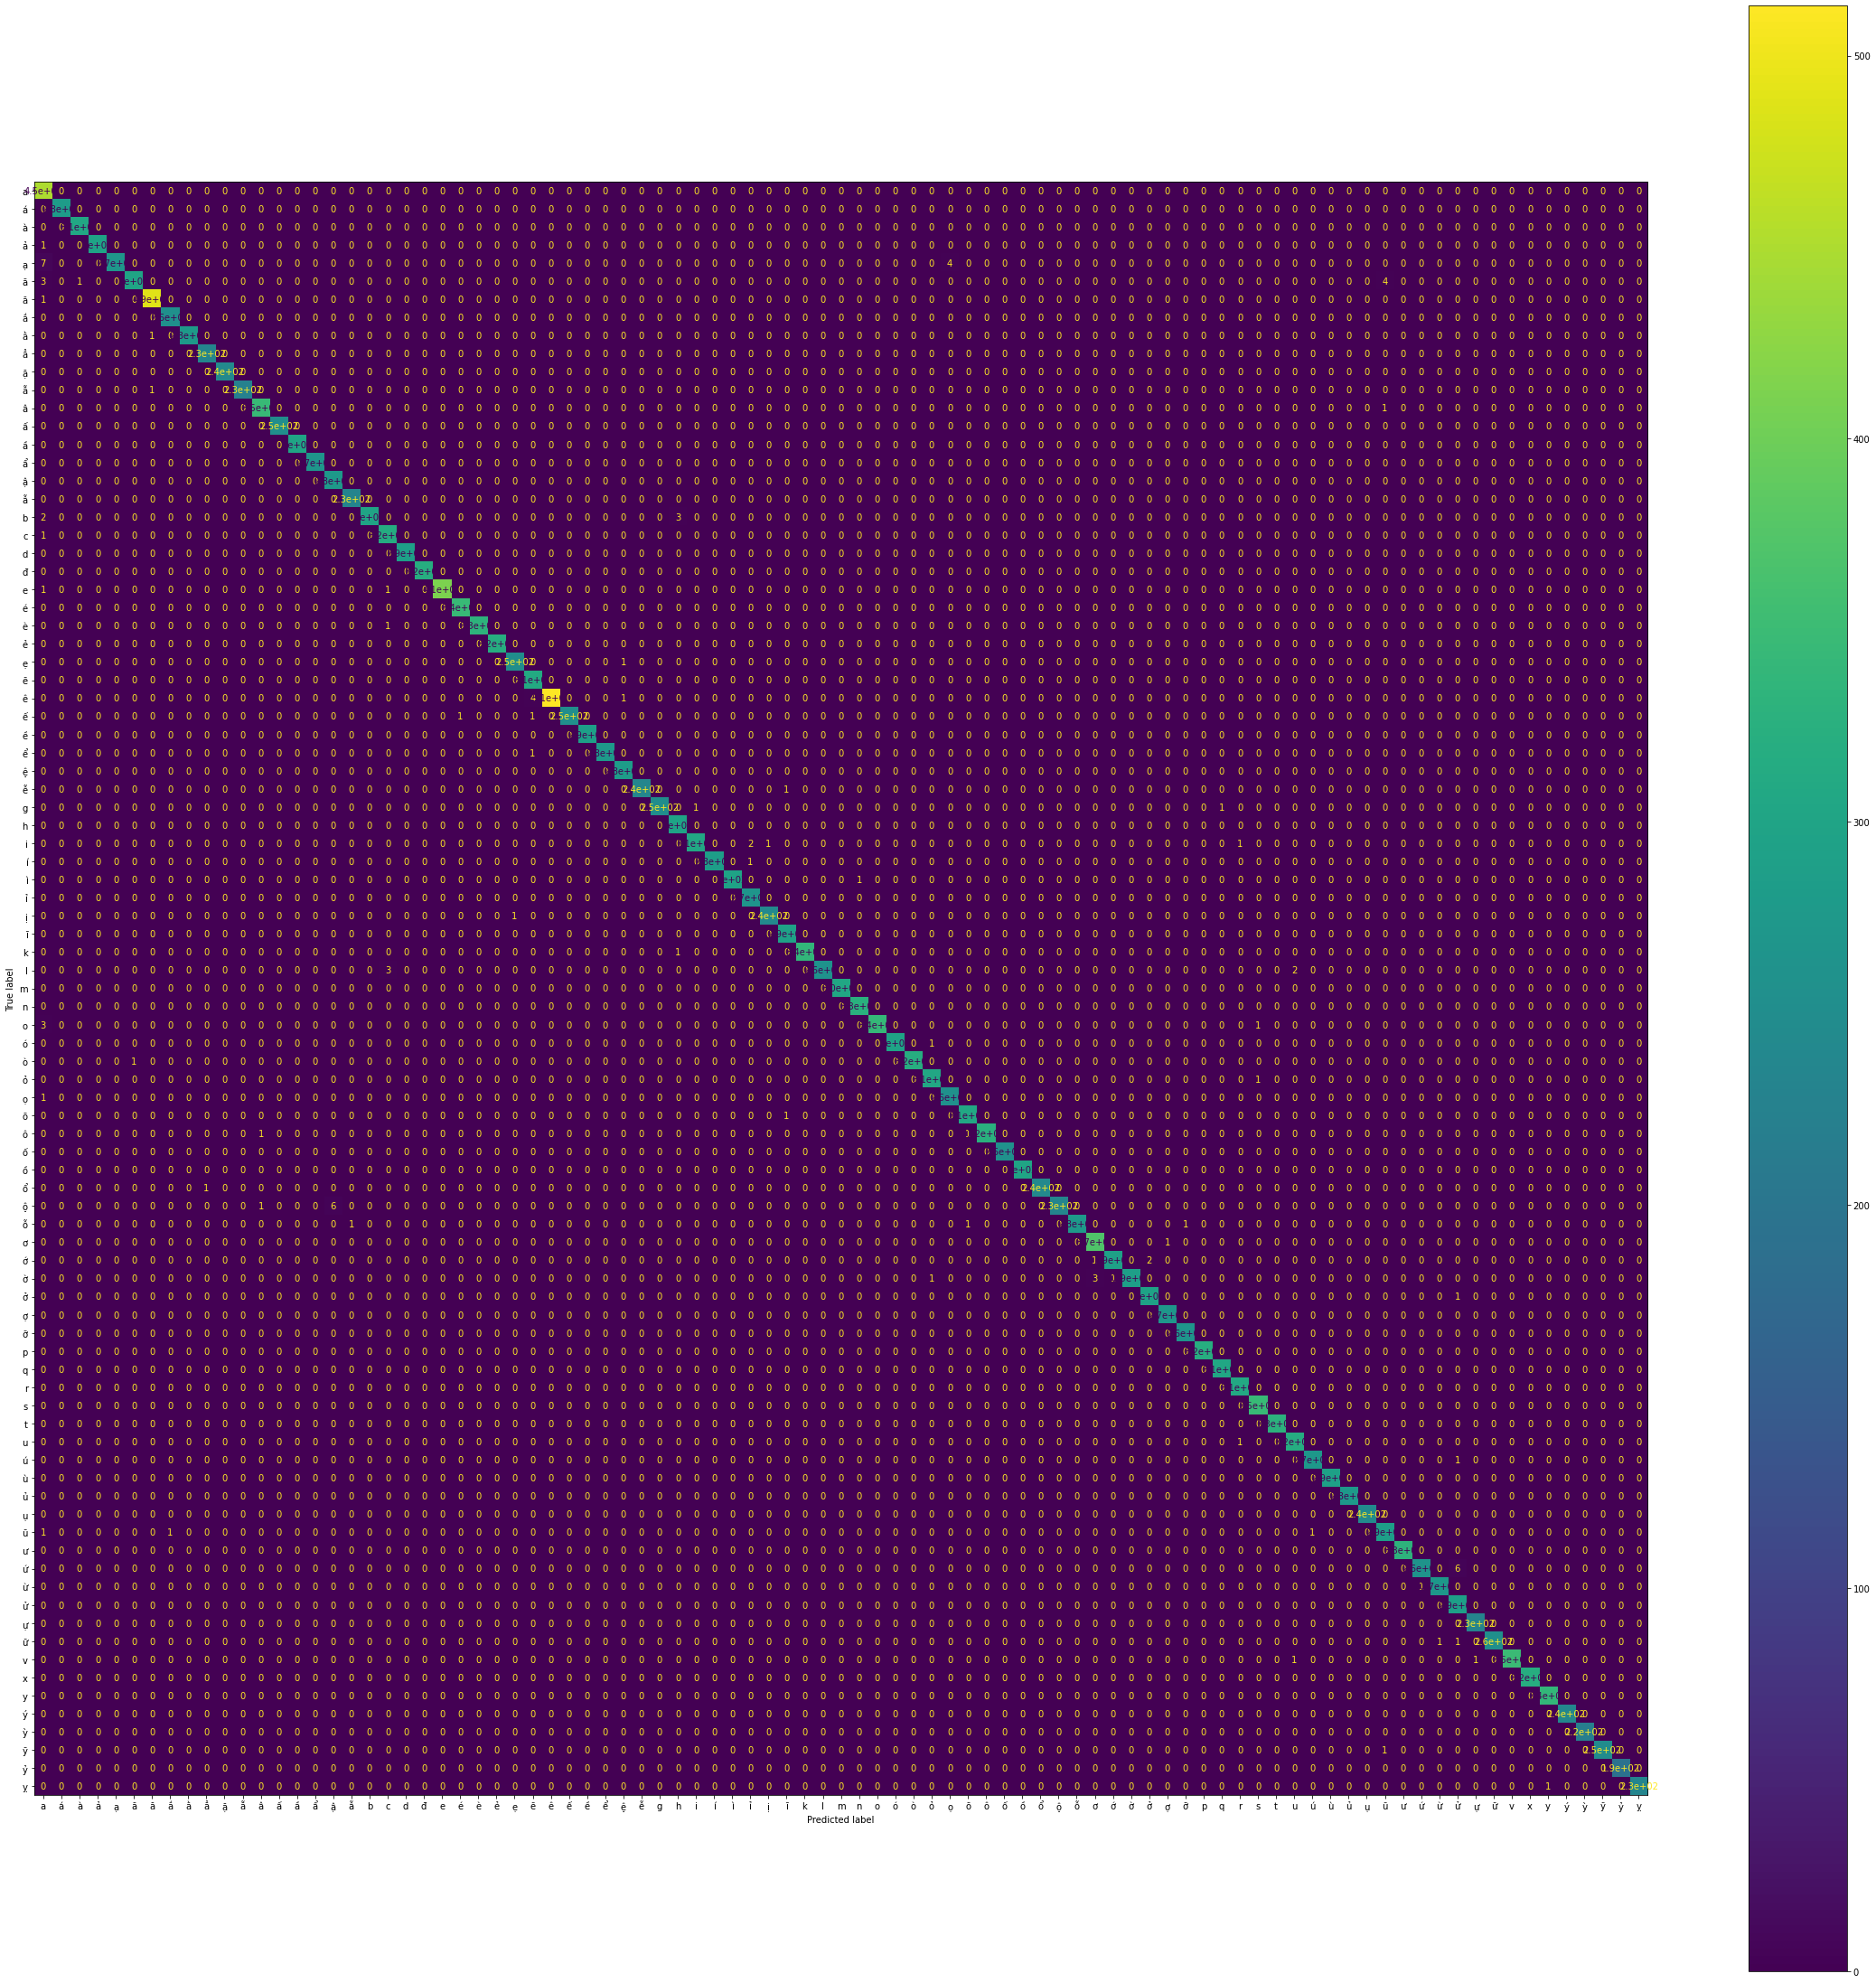

classification report on train set
              precision    recall  f1-score   support

           a       0.96      1.00      0.98       450
           á       1.00      1.00      1.00       284
           à       1.00      1.00      1.00       308
           ả       1.00      1.00      1.00       298
           ạ       1.00      0.96      0.98       280
           ã       1.00      0.97      0.99       308
           ă       1.00      1.00      1.00       491
           ắ       1.00      1.00      1.00       258
           ằ       1.00      1.00      1.00       280
           ẳ       1.00      1.00      1.00       234
           ặ       1.00      1.00      1.00       242
           ẵ       1.00      1.00      1.00       227
           â       0.99      1.00      1.00       347
           ấ       1.00      1.00      1.00       254
           ầ       1.00      1.00      1.00       299
           ẩ       1.00      1.00      1.00       268
           ậ       0.98      1.00      0.99   

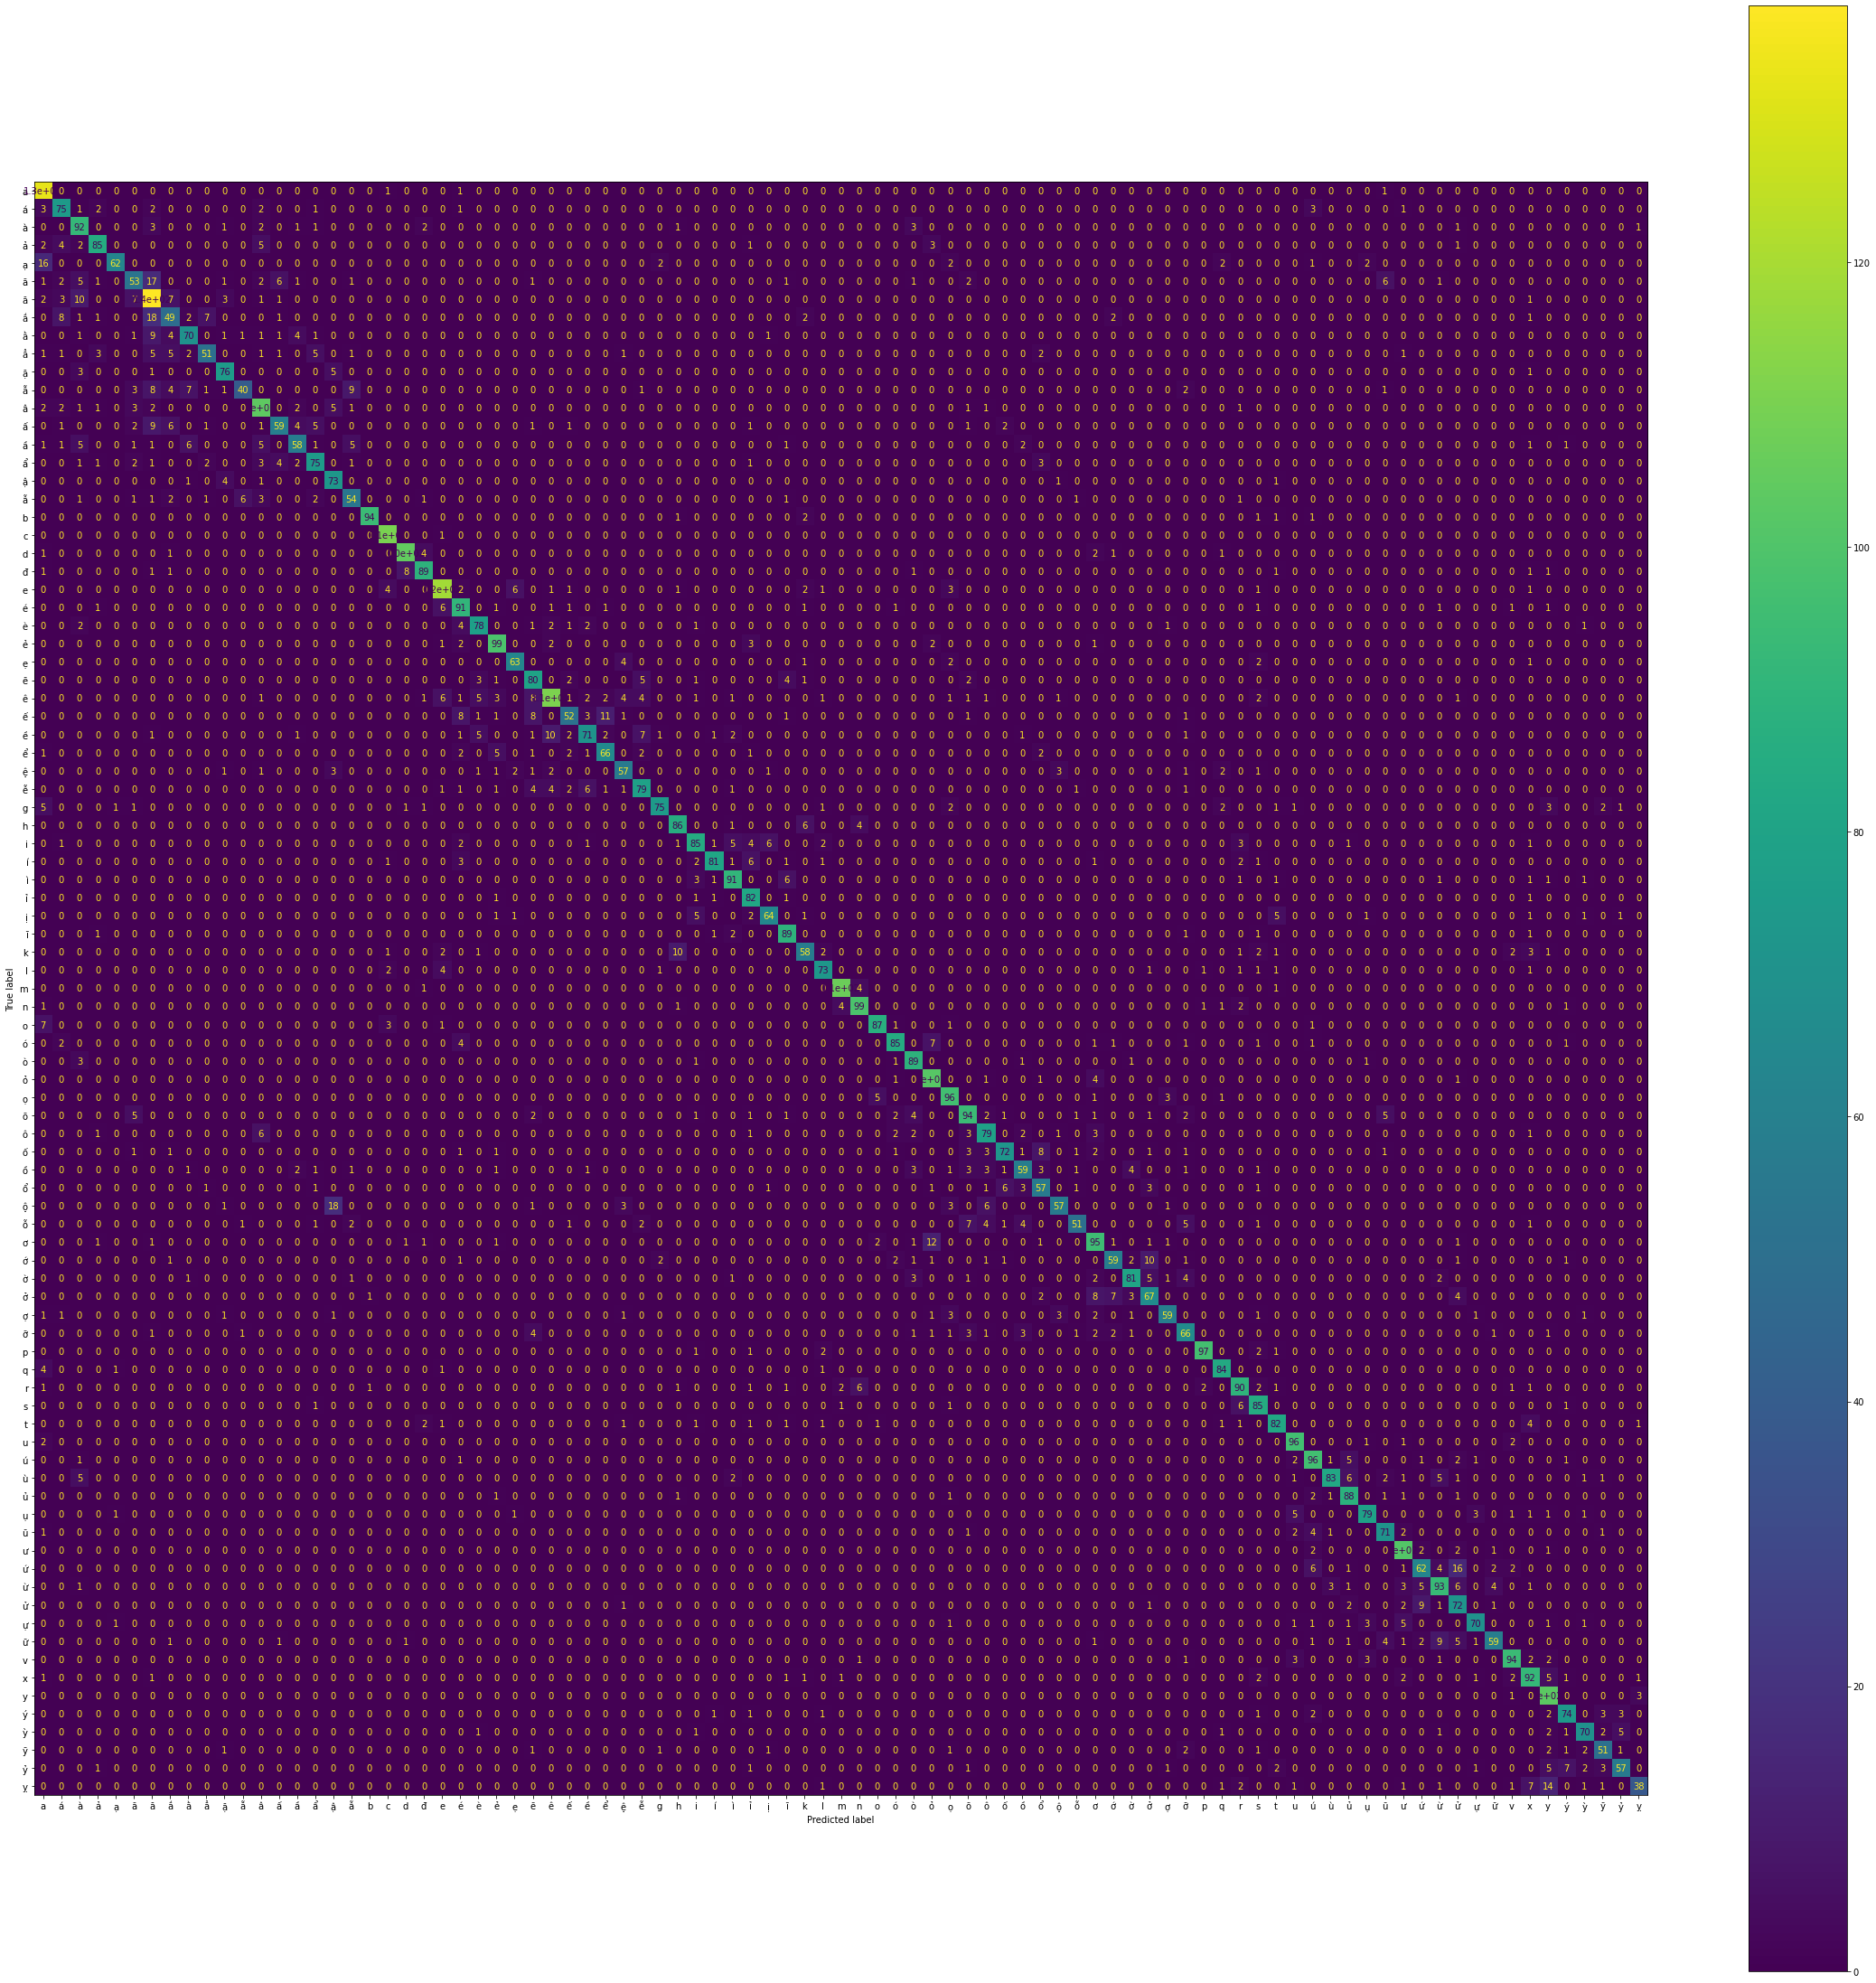

classification report on test set
              precision    recall  f1-score   support

           a       0.71      0.98      0.82       136
           á       0.74      0.82      0.78        91
           à       0.68      0.85      0.76       108
           ả       0.86      0.83      0.84       103
           ạ       0.94      0.71      0.81        87
           ã       0.66      0.52      0.58       102
           ă       0.63      0.80      0.70       173
           ắ       0.60      0.53      0.56        92
           ằ       0.78      0.74      0.76        95
           ẳ       0.80      0.64      0.71        80
           ặ       0.84      0.88      0.86        86
           ẵ       0.82      0.52      0.63        77
           â       0.75      0.83      0.78       126
           ấ       0.80      0.63      0.70        94
           ầ       0.77      0.65      0.71        89
           ẩ       0.79      0.78      0.79        96
           ậ       0.70      0.90      0.78    

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/dataML/Model_Flatten/modelNN3.pickle", 'rb') as file_model:
    modelLR = pickle.load(file_model)
    
print(f'Train Score: {modelLR.score(x_train, y_train)}')
cm = plot_confusion_matrix(modelLR, x_train, y_train, display_labels=labels)
plt.show()
print(f'classification report on train set')
predictTrain = modelLR.predict(x_train)
print(classification_report(y_train, predictTrain, target_names=labels))

print(f'Test Score: {modelLR.score(x_test, y_test)}')
cm = plot_confusion_matrix(modelLR, x_test, y_test, display_labels=labels)
plt.show()
print(f'classification report on test set')
predictTest = modelLR.predict(x_test)
print(classification_report(y_test, predictTest, target_names=labels))